In [17]:
# Import necessary libraries
!pip install tensorflow opencv-python matplotlib

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix, classification_report


In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/gtsrb-german-traffic-sign


In [16]:

import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def load_data(data_dir, img_size=32):
    images, labels = [], []
    for class_id in range(len(os.listdir(data_dir))):  # each folder = one class
        class_path = os.path.join(data_dir, str(class_id))
        if not os.path.isdir(class_path):
            continue
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = cv2.imread(img_path)
                img = cv2.resize(img, (img_size, img_size))
                images.append(img)
                labels.append(class_id)
            except:
                continue
    return np.array(images), np.array(labels)

# Load training data
train_path = os.path.join(path, "Train")
X, y = load_data(train_path)

print("Dataset shape:", X.shape, y.shape)

# Normalize
X = X / 255.0
y = to_categorical(y)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Dataset shape: (39209, 32, 32, 3) (39209,)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = y.shape[1]

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)


Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 56s 111ms/step - accuracy: 0.2762 - loss: 2.7444 - val_accuracy: 0.8523 - val_loss: 0.6129
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 79s 106ms/step - accuracy: 0.7482 - loss: 0.8015 - val_accuracy: 0.9489 - val_loss: 0.2653
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 49s 100ms/step - accuracy: 0.8498 - loss: 0.4823 - val_accuracy: 0.9690 - val_loss: 0.1395
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 83s 103ms/step - accuracy: 0.8950 - loss: 0.3330 - val_accuracy: 0.9759 - val_loss: 0.1127
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 48s 98ms/step - accuracy: 0.9184 - loss: 0.2656 - val_accuracy: 0.9823 - val_loss: 0.0810
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 50s 102ms/step - accuracy: 0.9334 - loss: 0.2145 - val_accuracy: 0.9834 - val_loss: 0.0721
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 84s 106ms/step - accuracy: 0.9422 - loss: 0.1871 - val_accuracy: 0.9847 - val_loss: 0.0691
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.9456 - loss: 0.

246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9882 - loss: 0.0481
Validation Accuracy: 0.98916095495224
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


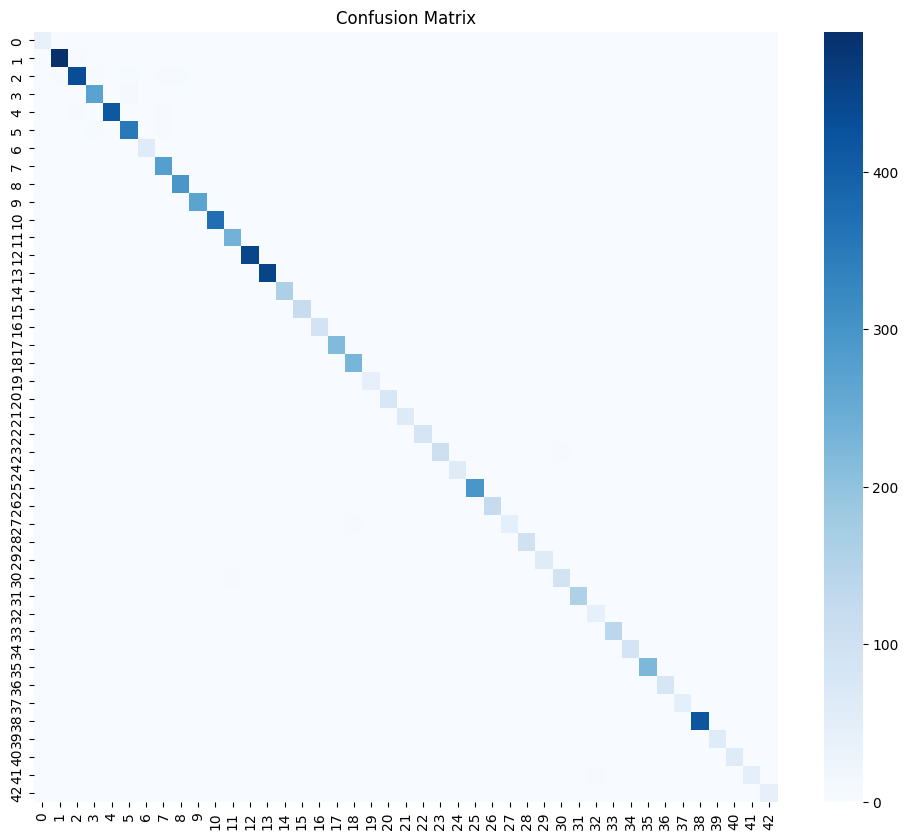

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.99      0.99      0.99       496
           2       0.99      0.96      0.98       450
           3       0.97      0.97      0.97       280
           4       1.00      0.99      0.99       418
           5       0.96      0.97      0.97       364
           6       1.00      1.00      1.00        59
           7       0.98      1.00      0.99       278
           8       0.98      0.98      0.98       301
           9       1.00      1.00      1.00       268
          10       0.99      1.00      1.00       370
          11       0.99      1.00      0.99       236
          12       1.00      1.00      1.00       450
          13       1.00      1.00      1.00       452
          14       1.00      0.99      1.00       162
          15       1.00      1.00      1.00       120
          16       1.00      1.00      1.00        90
          17       1.00    

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation Accuracy:", val_acc)

# Predictions
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes))
